## Dataset Loading 

In [1]:
!pip install seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk import FreqDist
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
data=pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [4]:
data.tail()

,id,label,tweet
7915,7916,0,Live out loud #lol #liveoutloud #selfie #smile...
7916,7917,0,We would like to wish you an amazing day! Make...
7917,7918,0,Helping my lovely 90 year old neighbor with he...
7918,7919,0,Finally got my #smart #pocket #wifi stay conne...
7919,7920,0,Apple Barcelona!!! #Apple #Store #BCN #Barcelo...


In [5]:
#data type info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


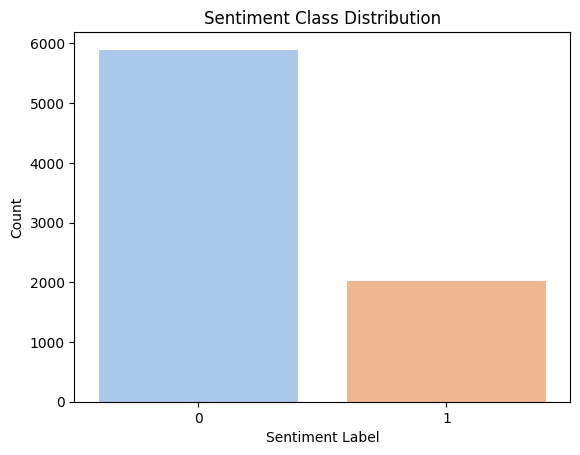

In [6]:
# Plot: Class distribution
sns.countplot(x='label', data=data, palette='pastel')
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment Label")
plt.ylabel("Count")
plt.show()

## Data Preprocessing

In [7]:
data.shape

(7920, 3)

In [8]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7915    False
7916    False
7917    False
7918    False
7919    False
Length: 7920, dtype: bool

In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
data.isnull()

,id,label,tweet
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
7915,False,False,False
7916,False,False,False
7917,False,False,False
7918,False,False,False


In [11]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### Text Preprocessing

In [12]:
data["tweet"].head(10)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
5    iPhone software update fucked up my phone big ...
6    Happy for us .. #instapic #instadaily #us #son...
7    New Type C charger cable #UK http://www.ebay.c...
8    Bout to go shopping again listening to music #...
9    Photo: #fun #selfie #pool #water #sony #camera...
Name: tweet, dtype: object

In [13]:
data["tweet"].tail(5)

7915    Live out loud #lol #liveoutloud #selfie #smile...
7916    We would like to wish you an amazing day! Make...
7917    Helping my lovely 90 year old neighbor with he...
7918    Finally got my #smart #pocket #wifi stay conne...
7919    Apple Barcelona!!! #Apple #Store #BCN #Barcelo...
Name: tweet, dtype: object

convert uppercase to lowercase

In [14]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))
                                         

In [15]:
data["tweet"].head(10)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
5    iphone software update fucked up my phone big ...
6    happy for us .. #instapic #instadaily #us #son...
7    new type c charger cable #uk http://www.ebay.c...
8    bout to go shopping again listening to music #...
9    photo: #fun #selfie #pool #water #sony #camera...
Name: tweet, dtype: object

In [16]:
data["tweet"].tail(5)

7915    live out loud #lol #liveoutloud #selfie #smile...
7916    we would like to wish you an amazing day! make...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my #smart #pocket #wifi stay conne...
7919    apple barcelona!!! #apple #store #bcn #barcelo...
Name: tweet, dtype: object

Remove links

In [17]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [18]:
data["tweet"].head(10)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
5    iphone software update fucked up my phone big ...
6    happy for us .. #instapic #instadaily #us #son...
7    new type c charger cable #uk  … #bay #amazon #...
8    bout to go shopping again listening to music #...
9    photo: #fun #selfie #pool #water #sony #camera...
Name: tweet, dtype: object

Remove punctuations

In [19]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text= text.replace(punctuation, '')
    return text
data["tweet"] = data["tweet"].apply(remove_punctuations)

In [21]:
data["tweet"].head(10)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
5    iphone software update fucked up my phone big ...
6    happy for us  instapic instadaily us sony xper...
7    new type c charger cable uk  … bay amazon etsy...
8    bout to go shopping again listening to music i...
9    photo fun selfie pool water sony camera picoft...
Name: tweet, dtype: object

In [22]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

Remove Numbers

In [23]:
data["tweet"]= data['tweet'].str.replace('\d+', '', regex=True)

In [24]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

Remove Stopwords

In [25]:
!pip install nltk


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import nltk

In [27]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [28]:
with open('../static/model/corpora/stopwords/english','r') as file:
    sw=file.read().splitlines()

In [29]:
data["tweet"]= data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [30]:
data["tweet"].head(10)

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
5    iphone software update fucked phone big time s...
6    happy us instapic instadaily us sony xperia xp...
7    new type c charger cable uk … bay amazon etsy ...
8    bout go shopping listening music iphone justme...
9    photo fun selfie pool water sony camera picoft...
Name: tweet, dtype: object

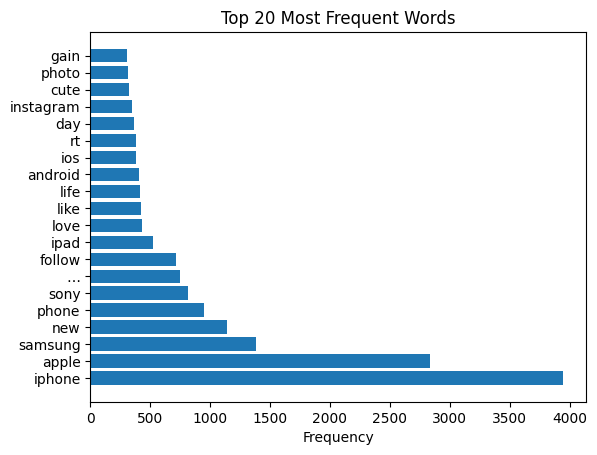

In [31]:
from collections import Counter

words = ' '.join(data['tweet']).split()
word_freq = Counter(words).most_common(20)

plt.barh([word[0] for word in word_freq], [word[1] for word in word_freq])
plt.title("Top 20 Most Frequent Words")
plt.xlabel("Frequency")
plt.show()

Stemming

In [32]:
from nltk.stem import PorterStemmer
ps= PorterStemmer()

In [33]:
data["tweet"]= data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [34]:
data["tweet"].head(10)

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
5    iphon softwar updat fuck phone big time stupid...
6    happi us instap instadaili us soni xperia xperiaz
7    new type c charger cabl uk … bay amazon etsi n...
8    bout go shop listen music iphon justm music li...
9    photo fun selfi pool water soni camera picofth...
Name: tweet, dtype: object

In [35]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


#### Exploratory data analysis

In [36]:
!pip install wordcloud


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
#display visualize the frequent words
all_words =" ".join([sentence for sentence in data['tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

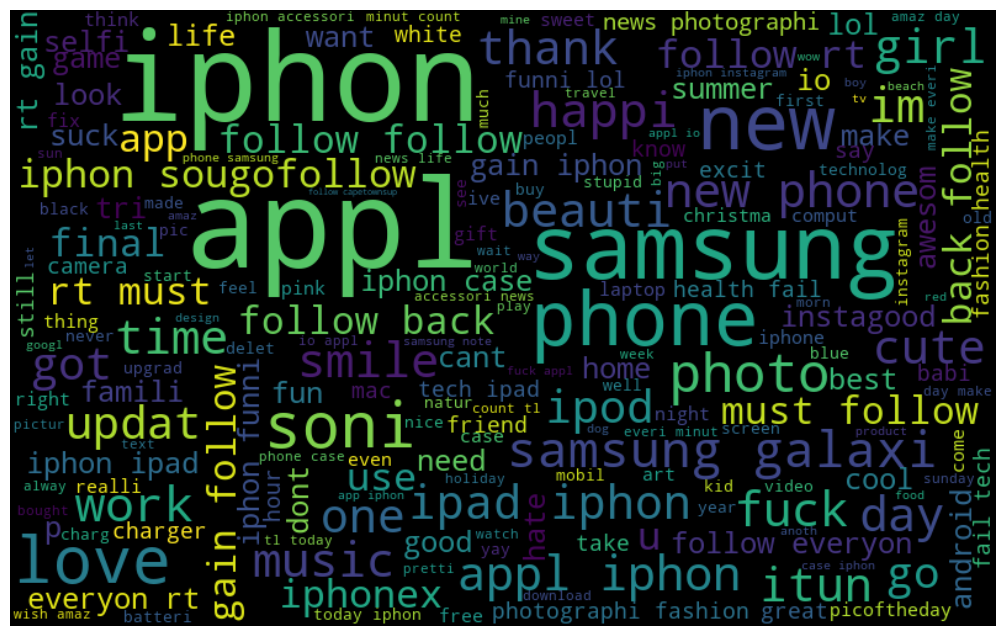

In [38]:
#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [39]:
#frequent words visualization for +ve
all_words =" ".join([sentence for sentence in data['tweet'][data['label']==0]])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

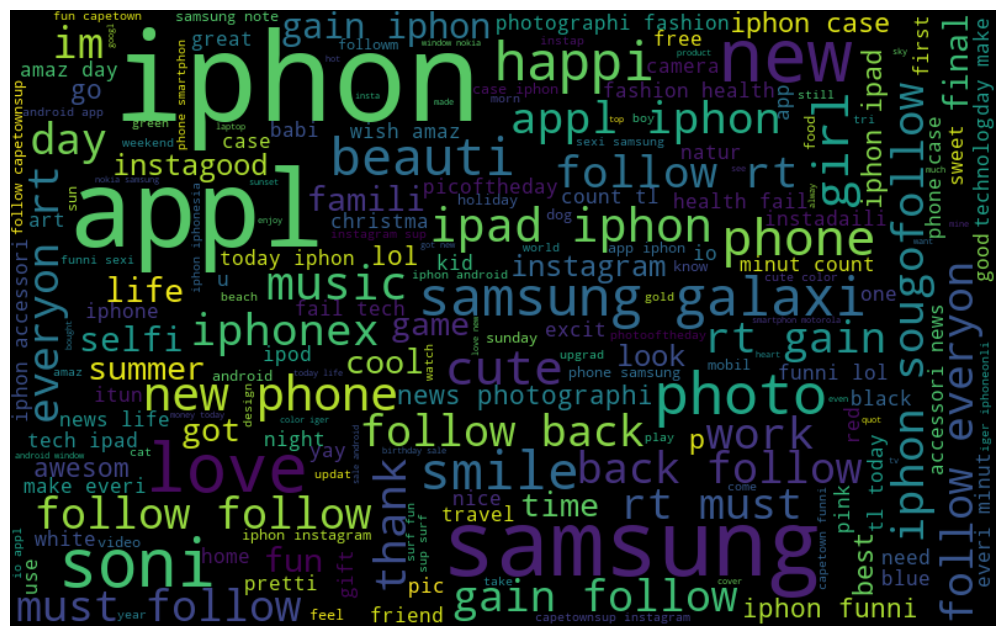

In [40]:
#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [41]:
#frequent words visualization for -ve
all_words =" ".join([sentence for sentence in data['tweet'][data['label']==1]])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

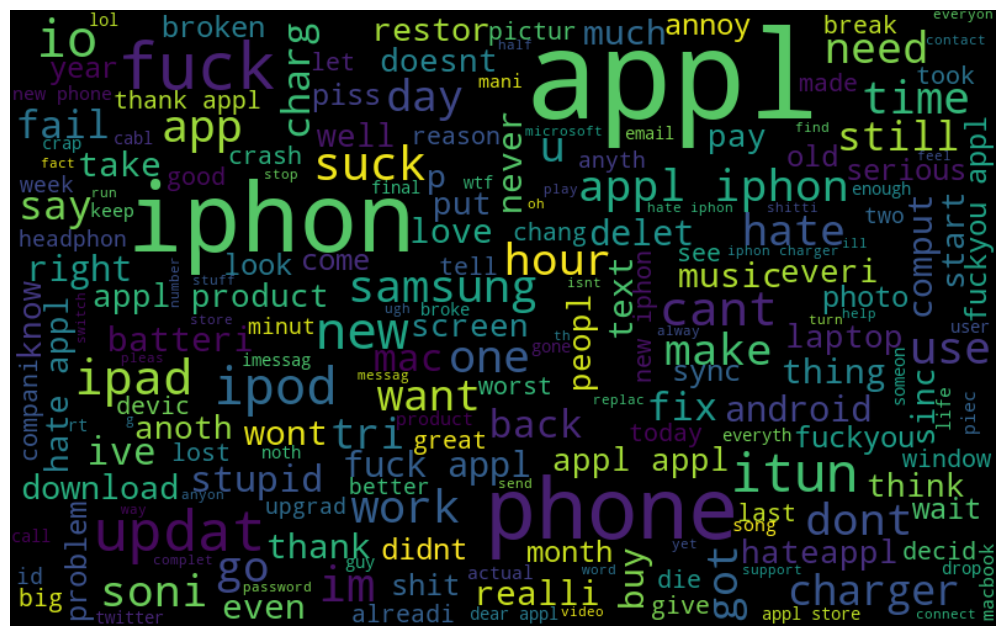

In [42]:
#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

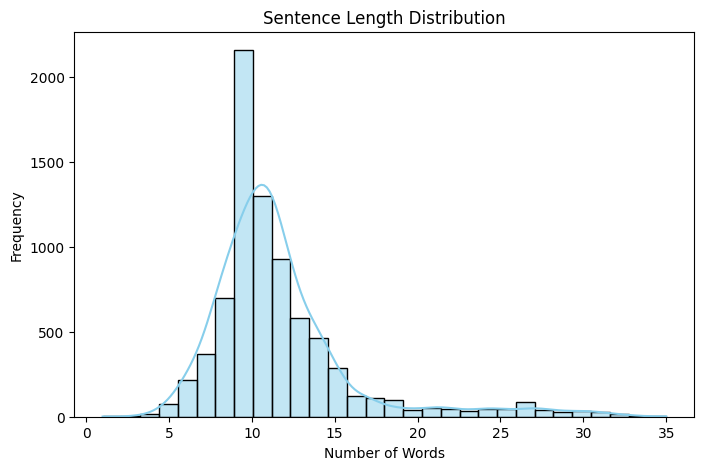

In [43]:
# Add a column for sentence length (in words)
data['text_length'] = data['tweet'].apply(lambda x: len(x.split()))

# Plot: Sentence length distribution
plt.figure(figsize=(8,5))
sns.histplot(data['text_length'], bins=30, kde=True, color='skyblue')
plt.title("Sentence Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

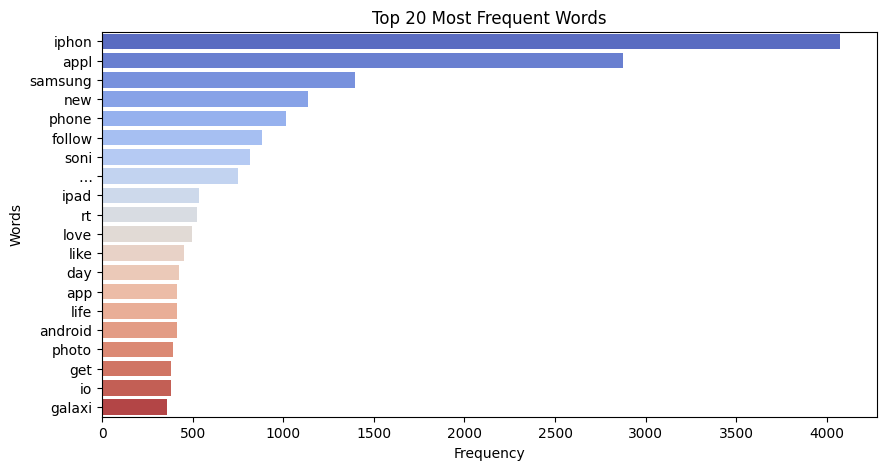

In [44]:
from collections import Counter

# Tokenize all tweets into words
all_words = ' '.join(data['tweet']).split()
word_freq = Counter(all_words)

# Get 20 most common words
common_words = word_freq.most_common(20)
words, counts = zip(*common_words)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=list(counts), y=list(words), palette='coolwarm')
plt.title("Top 20 Most Frequent Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()


In [45]:

from collections import Counter

positive_words = ' '.join(data[data['label']==0]['tweet']).split()
negative_words = ' '.join(data[data['label']==1]['tweet']).split()

print("Most common in POSITIVE:")
print(Counter(positive_words).most_common(10))

print("\nMost common in NEGATIVE:")
print(Counter(negative_words).most_common(10))


Most common in POSITIVE:
[('iphon', 3424), ('appl', 1571), ('samsung', 1283), ('new', 954), ('follow', 881), ('soni', 737), ('…', 705), ('phone', 604), ('rt', 494), ('love', 456)]

Most common in NEGATIVE:
[('appl', 1305), ('iphon', 649), ('phone', 411), ('fuck', 255), ('get', 204), ('updat', 186), ('new', 183), ('io', 162), ('itun', 136), ('work', 136)]


### Building Vocabulary

In [46]:
from collections import Counter
vocab= Counter()

In [47]:
vocab

Counter()

In [48]:
for sentence in data["tweet"]:
    vocab.update(sentence.split())
    

In [49]:
len(vocab)

15949

In [50]:
data.shape


(7920, 4)

In [51]:
tokens= [key for key in vocab if vocab[key]>10]

In [52]:
len(tokens)

1145

In [53]:
def save_vocabulary(lines, filename):
    data= '\n'.join(lines)
    file= open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

### Divide dataset

In [54]:
x = data['tweet']
y = data['label']

In [55]:
!pip install scikit-learn



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.2)

In [57]:
x_train.shape

(6336,)

In [58]:
x_test.shape

(1584,)

In [59]:
y_train

5157    0
474     0
1704    0
1830    0
5793    0
       ..
3428    0
433     1
2245    0
3079    0
6789    1
Name: label, Length: 6336, dtype: int64

In [60]:
x_train

5157    petstagram iphon instagram cute puppi sleepi a...
474     … link bio apparel everyth els use code blackf...
1704    saw cute guy got happi william gay horni girl ...
1830    yaa appl store munich photographi iphoneonli i...
5793    rain didnt wake loud bang flash flood alert iphon
                              ...                        
3428    also dont want appl id email address want keep...
433     use iphon htcuk one goe th repair hope straigh...
2245    photo io iphon iphon appl weather sky outdoor ...
3079    secret magic crystal … андроид android game ne...
6789                                   go appl new io map
Name: tweet, Length: 6336, dtype: object

In [61]:
x_test

4182          whole iphon wipe restor get iso even differ
7150    fiesta fiesta cat cat chat anim pet funni cute...
2237    appl suck big time it’ incred buy expens iphon...
6962         cant wait get verizon iphon appl itsabouttim
4486    gain follow rt must follow follow back follow ...
                              ...                        
2433    ugh rumor appletwitt deal quit twitter cold tu...
3255    send contact plz new iphon didnt sync info pho...
2240                dont get new updat mess app hateiphon
3904    tunnel joy peac reflect rememb sky cloud cloud...
42      new phone cupcak wallpap pink cute sweet samsu...
Name: tweet, Length: 1584, dtype: object

In [62]:
y_test

4182    1
7150    0
2237    1
6962    0
4486    0
       ..
2433    1
3255    1
2240    1
3904    0
42      0
Name: label, Length: 1584, dtype: int64

### Vecorization

In [63]:
def vectorizer(ds, vocabulary):
    vectorized_lst =[]

    for sentence in ds:
        sentence_lst =np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i]=1

        vectorized_lst.append(sentence_lst)

    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)

    return vectorized_lst_new
                

In [64]:
vectorized_x_train = vectorizer(x_train,tokens)

In [65]:
vectorized_x_train[0]

array([0., 0., 0., ..., 0., 0., 0.], shape=(1145,), dtype=float32)

In [66]:
vectorized_x_test = vectorizer(x_test,tokens)

In [67]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(6336, 1145), dtype=float32)

In [68]:
y_train

5157    0
474     0
1704    0
1830    0
5793    0
       ..
3428    0
433     1
2245    0
3079    0
6789    1
Name: label, Length: 6336, dtype: int64

In [69]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1145), dtype=float32)

In [70]:
y_test

4182    1
7150    0
2237    1
6962    0
4486    0
       ..
2433    1
3255    1
2240    1
3904    0
42      0
Name: label, Length: 1584, dtype: int64

In [71]:
y_train.value_counts()

label
0    4717
1    1619
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1bcc3e8b280>,
 [Text(-0.7642027668961265, 0.7911979089130003, 'Positive'),
  Text(0.764203024701088, -0.7911976599040902, 'Negative')])

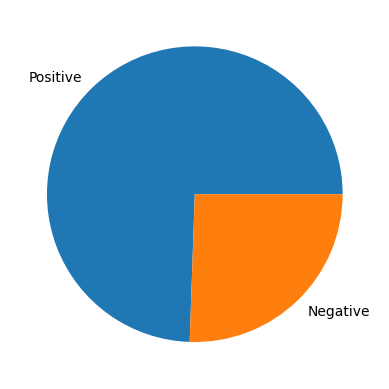

In [72]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive','Negative'])

### Handle Imbalanced dataset

In [73]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [74]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9434, 1145) (9434,)


In [75]:
y_train_smote.value_counts()

label
0    4717
1    4717
Name: count, dtype: int64

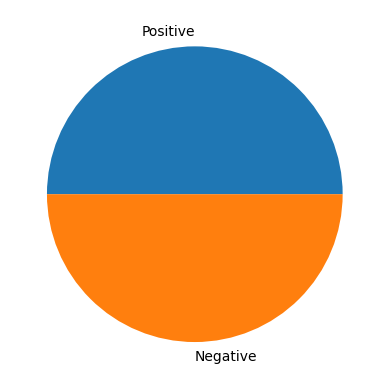

In [76]:
plt.pie(
    np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]),
    labels=['Positive', 'Negative']
)
plt.show()

In [77]:
vectorized_x_train_smote

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.4919638, ..., 0.       , 0.       ,
        0.       ]], shape=(9434, 1145), dtype=float32)

In [78]:
y_train_smote

0       0
1       0
2       0
3       0
4       0
       ..
9429    1
9430    1
9431    1
9432    1
9433    1
Name: label, Length: 9434, dtype: int64

In [79]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1584, 1145), dtype=float32)

In [80]:
y_test

4182    1
7150    0
2237    1
6962    0
4486    0
       ..
2433    1
3255    1
2240    1
3904    0
42      0
Name: label, Length: 1584, dtype: int64

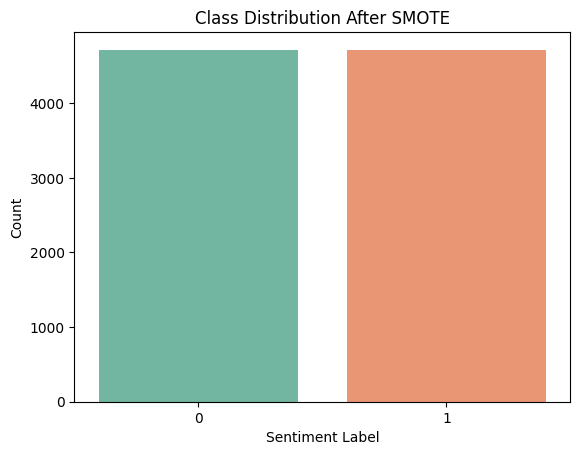

In [81]:
# Plot class distribution after SMOTE
from collections import Counter

smote_labels = pd.Series(y_train_smote)

sns.countplot(x=smote_labels, palette='Set2')
plt.title("Class Distribution After SMOTE")
plt.xlabel("Sentiment Label")
plt.ylabel("Count")
plt.show()

## Model Training and Evaluation

In [82]:
pip install xgboost lightgbm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [84]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred),3)
    rec=round(recall_score(y_act, y_pred),3)
    f1=round(f1_score(y_act, y_pred),3)
    print(f'Training Scores:\n\tAccuracy ={acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred),3)
    rec=round(recall_score(y_act, y_pred),3)
    f1=round(f1_score(y_act, y_pred),3)
    print(f'Testing Scores:\n\tAccuracy ={acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

## Logistic Regression

In [85]:
lr = LogisticRegression(max_iter=5000)
lr.fit(vectorized_x_train_smote, y_train_smote) 


LogisticRegression(max_iter=5000)

In [86]:
y_train_pred = lr.predict(vectorized_x_train_smote)

In [87]:
y_train_pred

array([0, 0, 0, ..., 1, 1, 1], shape=(9434,))

In [88]:
y_train_smote

0       0
1       0
2       0
3       0
4       0
       ..
9429    1
9430    1
9431    1
9432    1
9433    1
Name: label, Length: 9434, dtype: int64

In [89]:
training_scores(y_train_smote, y_train_pred)

Training Scores:
	Accuracy =0.94
	Precision = 0.915
	Recall = 0.97
	F1-Score = 0.942


In [90]:
y_test_pred = lr.predict(vectorized_x_test)

In [91]:
y_test_pred

array([1, 0, 1, ..., 1, 0, 0], shape=(1584,))

In [92]:
y_test

4182    1
7150    0
2237    1
6962    0
4486    0
       ..
2433    1
3255    1
2240    1
3904    0
42      0
Name: label, Length: 1584, dtype: int64

In [93]:
validation_scores(y_test, y_test_pred)

Testing Scores:
	Accuracy =0.878
	Precision = 0.724
	Recall = 0.85
	F1-Score = 0.782


### Hyperparameter Optimization for Logistic Regression

In [94]:
# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],                
    'penalty': ['l2'],                           
    'solver': ['lbfgs', 'saga'],                 
    'max_iter': [100, 200, 500]                  
}

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit grid search
grid_search.fit(vectorized_x_train_smote, y_train_smote)

# Best model
best_lr = grid_search.best_estimator_

# Show best parameters
print("Best Parameters:", grid_search.best_params_)

# Predictions
y_train_pred = best_lr.predict(vectorized_x_train_smote)
y_test_pred = best_lr.predict(vectorized_x_test)

# Evaluation
print("\n Optimized Logistic Regression Model Performance (After Hyperparameter Tuning):")
training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}

 Optimized Logistic Regression Model Performance (After Hyperparameter Tuning):
Training Scores:
	Accuracy =0.94
	Precision = 0.915
	Recall = 0.97
	F1-Score = 0.942
Testing Scores:
	Accuracy =0.876
	Precision = 0.721
	Recall = 0.843
	F1-Score = 0.777


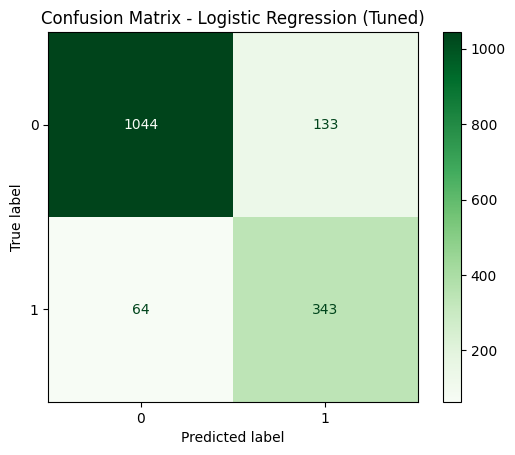

In [95]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, cmap='Greens')
plt.title("Confusion Matrix - Logistic Regression (Tuned)")
plt.show()


### ROC AUC scores, curve for Logistic Regression

In [96]:
# Get predicted probabilities for the positive class (1)
y_proba_lr = best_lr.predict_proba(vectorized_x_test)[:, 1]


In [97]:
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)
print("Logistic Regression ROC-AUC Score:", roc_auc_lr)


Logistic Regression ROC-AUC Score: 0.9368590031291816


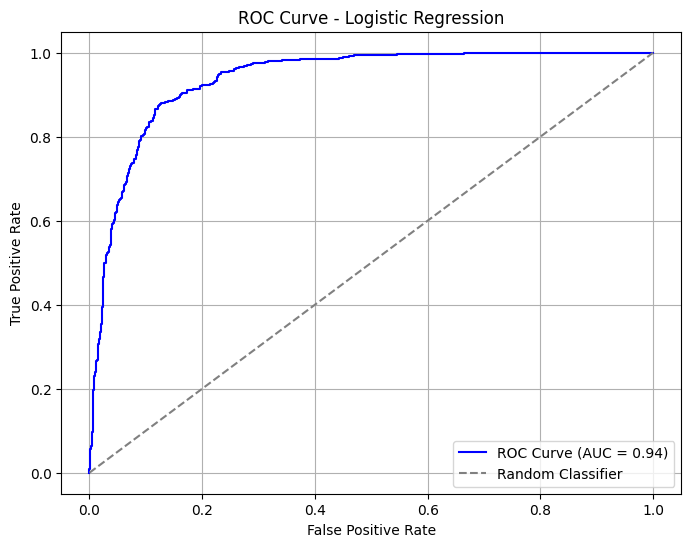

In [98]:
# Calculate FPR, TPR for ROC curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'ROC Curve (AUC = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

plt.title('ROC Curve - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Naive Bayes

In [99]:
mnb= MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

MultinomialNB()

In [100]:
y_train_pred = mnb.predict(vectorized_x_train_smote)
y_test_pred = mnb.predict(vectorized_x_test)
training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy =0.902
	Precision = 0.865
	Recall = 0.952
	F1-Score = 0.907
Testing Scores:
	Accuracy =0.867
	Precision = 0.68
	Recall = 0.914
	F1-Score = 0.78


### hyperparameter optimization NB


In [101]:
# Define parameter grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False]
}

# GridSearchCV setup
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(vectorized_x_train_smote, y_train_smote)

# Best model
best_mnb = grid_search.best_estimator_


# Show best parameters
print("Best Parameters:", grid_search.best_params_)

# Predictions
y_train_pred = best_mnb.predict(vectorized_x_train_smote)
y_test_pred = best_mnb.predict(vectorized_x_test)

# Evaluation
print("\n Optimized Model Performance (After Hyperparameter Tuning):")
training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Best Parameters: {'alpha': 0.1, 'fit_prior': True}

 Optimized Model Performance (After Hyperparameter Tuning):
Training Scores:
	Accuracy =0.906
	Precision = 0.872
	Recall = 0.952
	F1-Score = 0.91
Testing Scores:
	Accuracy =0.874
	Precision = 0.697
	Recall = 0.899
	F1-Score = 0.785


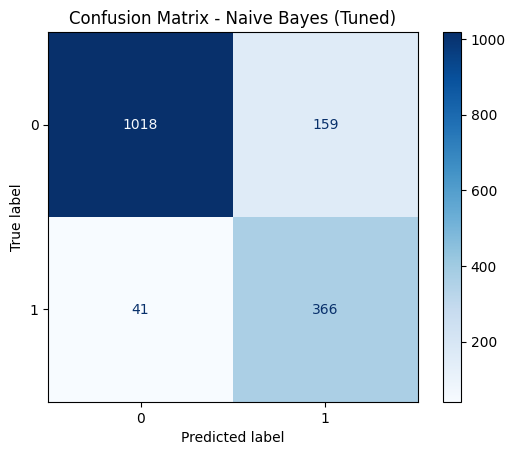

In [102]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes (Tuned)")
plt.show()


### ROC AUC scores, curve for Naive Bayes

In [103]:
y_proba_nb = best_mnb.predict_proba(vectorized_x_test)[:, 1]


In [104]:
roc_auc_nb = roc_auc_score(y_test, y_proba_nb)
print("Naive Bayes ROC-AUC Score:", roc_auc_nb)

Naive Bayes ROC-AUC Score: 0.9487849632284636


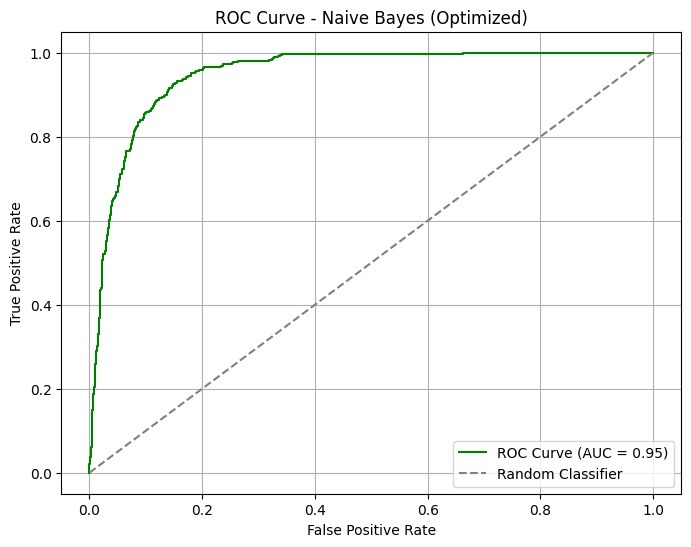

In [105]:
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_proba_nb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='green', label=f'ROC Curve (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

plt.title('ROC Curve - Naive Bayes (Optimized)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## XG Boost

In [106]:
xgb = XGBClassifier()
xgb.fit(vectorized_x_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [107]:
y_train_pred = xgb.predict(vectorized_x_train_smote)
y_test_pred = xgb.predict(vectorized_x_test)
training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy =0.94
	Precision = 0.927
	Recall = 0.955
	F1-Score = 0.941
Testing Scores:
	Accuracy =0.879
	Precision = 0.754
	Recall = 0.789
	F1-Score = 0.771


### Hyperparameter Optimization XG Boost 

In [108]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_grid=param_grid,
    scoring='f1_weighted',  # Good for class imbalance
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit grid search
grid_search.fit(vectorized_x_train_smote, y_train_smote)

# Best model
best_xgb = grid_search.best_estimator_

# Show best parameters
print("Best Parameters:", grid_search.best_params_)

# Predictions
y_train_pred = best_xgb.predict(vectorized_x_train_smote)
y_test_pred = best_xgb.predict(vectorized_x_test)

# Evaluation
print("\n Optimized XGBoost Model Performance (After Hyperparameter Tuning):")
training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}

 Optimized XGBoost Model Performance (After Hyperparameter Tuning):
Training Scores:
	Accuracy =0.95
	Precision = 0.941
	Recall = 0.96
	F1-Score = 0.951
Testing Scores:
	Accuracy =0.884
	Precision = 0.767
	Recall = 0.791
	F1-Score = 0.779


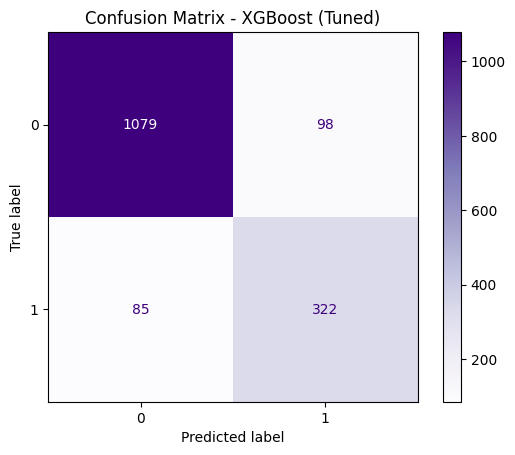

In [109]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, cmap='Purples')
plt.title("Confusion Matrix - XGBoost (Tuned)")
plt.show()


### ROC AUC scores, curve for XG Boost

In [110]:
y_proba_xgb = best_xgb.predict_proba(vectorized_x_test)[:, 1]


In [111]:
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)
print("XGBoost ROC-AUC Score:", roc_auc_xgb)

XGBoost ROC-AUC Score: 0.9417657017487094


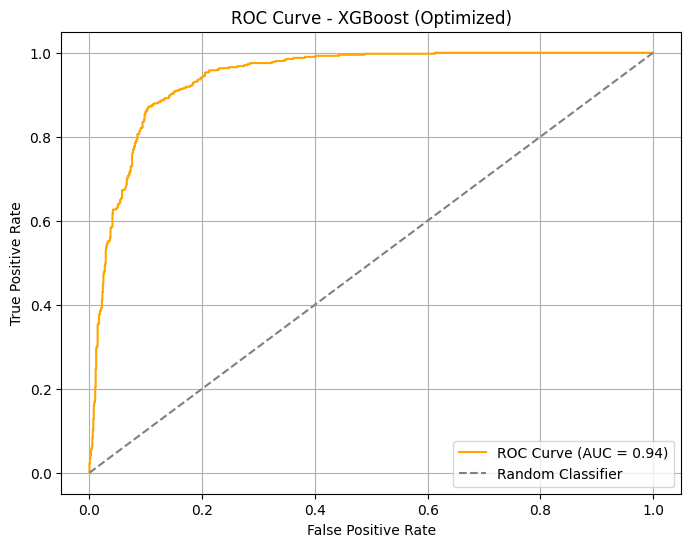

In [112]:
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='orange', label=f'ROC Curve (AUC = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

plt.title('ROC Curve - XGBoost (Optimized)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## LGBM classifier

In [113]:
lgbm = LGBMClassifier()
lgbm.fit(vectorized_x_train_smote, y_train_smote)

[LightGBM] [Info] Number of positive: 4717, number of negative: 4717
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035506 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8826
[LightGBM] [Info] Number of data points in the train set: 9434, number of used features: 762
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier()

In [114]:
y_train_pred = lgbm.predict(vectorized_x_train_smote)
y_test_pred = lgbm.predict(vectorized_x_test)
training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy =0.948
	Precision = 0.937
	Recall = 0.96
	F1-Score = 0.948
Testing Scores:
	Accuracy =0.886
	Precision = 0.772
	Recall = 0.791
	F1-Score = 0.782


### Hyperparameter optimization LGBM

In [115]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, -1],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 50],
    'boosting_type': ['gbdt']
}

# GridSearchCV setup
grid_search = GridSearchCV(
    estimator=LGBMClassifier(),
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit the grid search
grid_search.fit(vectorized_x_train_smote, y_train_smote)

# Best model
best_lgbm = grid_search.best_estimator_

# Show best parameters
print("Best Parameters:", grid_search.best_params_)

# Predictions
y_train_pred = best_lgbm.predict(vectorized_x_train_smote)
y_test_pred = best_lgbm.predict(vectorized_x_test)

# Evaluation
print("\n Optimized LightGBM Model Performance (After Hyperparameter Tuning):")
training_scores(y_train_smote, y_train_pred)
validation_scores(y_test, y_test_pred)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[LightGBM] [Info] Number of positive: 4717, number of negative: 4717
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040503 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8826
[LightGBM] [Info] Number of data points in the train set: 9434, number of used features: 762
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best Parameters: {'boosting_type': 'gbdt', 'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 100, 'num_leaves': 50}

 Optimized LightGBM Model Performance (After Hyperparameter Tuning):
Training Scores:
	Accuracy =0.963
	Precision = 0.96
	Recall = 0.967
	F1-Score = 0.963
Testing Scores:
	Accuracy =0.885
	Precision = 0.783
	Recall = 0.764
	F1-Score = 0.774


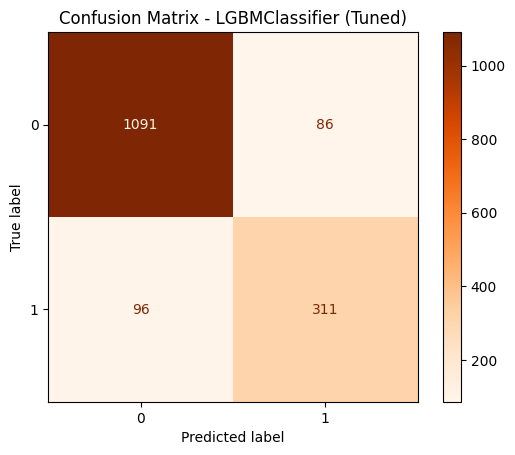

In [116]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred, cmap='Oranges')
plt.title("Confusion Matrix - LGBMClassifier (Tuned)")
plt.show()

### ROC AUC scores, curve for LGBM

In [117]:
y_proba_lgbm = best_lgbm.predict_proba(vectorized_x_test)[:, 1]

In [118]:
roc_auc_lgbm = roc_auc_score(y_test, y_proba_lgbm)
print("LightGBM ROC-AUC Score:", roc_auc_lgbm)

LightGBM ROC-AUC Score: 0.9427103012489588


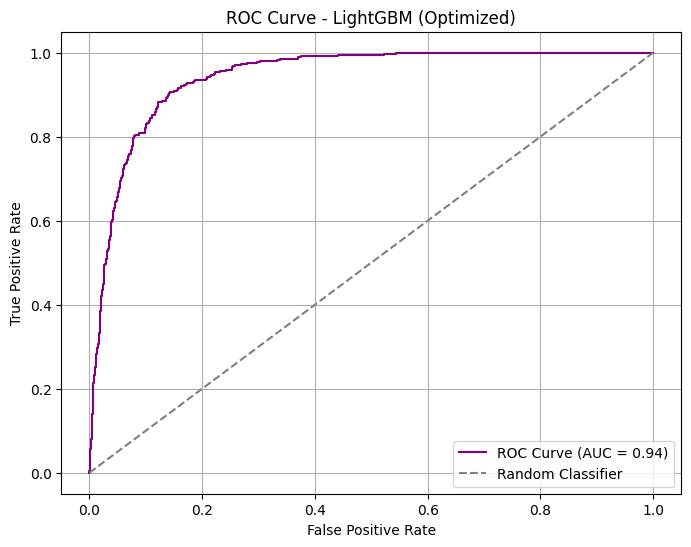

In [119]:
fpr_lgbm, tpr_lgbm, _ = roc_curve(y_test, y_proba_lgbm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lgbm, tpr_lgbm, color='purple', label=f'ROC Curve (AUC = {roc_auc_lgbm:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

plt.title('ROC Curve - LightGBM (Optimized)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### Brand-Level Sentiment Analysis

In [120]:
##  Brand-Level Sentiment Analysis
##This section evaluates the sentiment breakdown by mobile phone brands to understand their public reputation based on tweets.


In [121]:
print(data.columns)


Index(['id', 'label', 'tweet', 'text_length'], dtype='object')


In [122]:
brands = ['apple', 'samsung', 'sony', 'nokia', 'huawei']

In [123]:
brand_keywords = {
    'Apple': ['appl', 'iphon', 'io'],
    'Samsung': ['samsung', 'galaxi', 'note'],
    'Sony': ['sony', 'xperia'],
    'Nokia': ['nokia', 'lumia'],
    'Huawei': ['huawei', 'honor']
}
for brand, keywords in brand_keywords.items():
    pattern = '|'.join(keywords)
    brand_tweets = data[data['tweet'].str.contains(pattern, case=False, na=False)]
    
    pos = brand_tweets[brand_tweets['label'] == 0].shape[0]
    neg = brand_tweets[brand_tweets['label'] == 1].shape[0]

    print(f"{brand}: Positive = {pos}, Negative = {neg}")


Apple: Positive = 4182, Negative = 1500
Samsung: Positive = 1241, Negative = 137
Sony: Positive = 202, Negative = 7
Nokia: Positive = 56, Negative = 12
Huawei: Positive = 6, Negative = 4


#### visualize brands sentiments

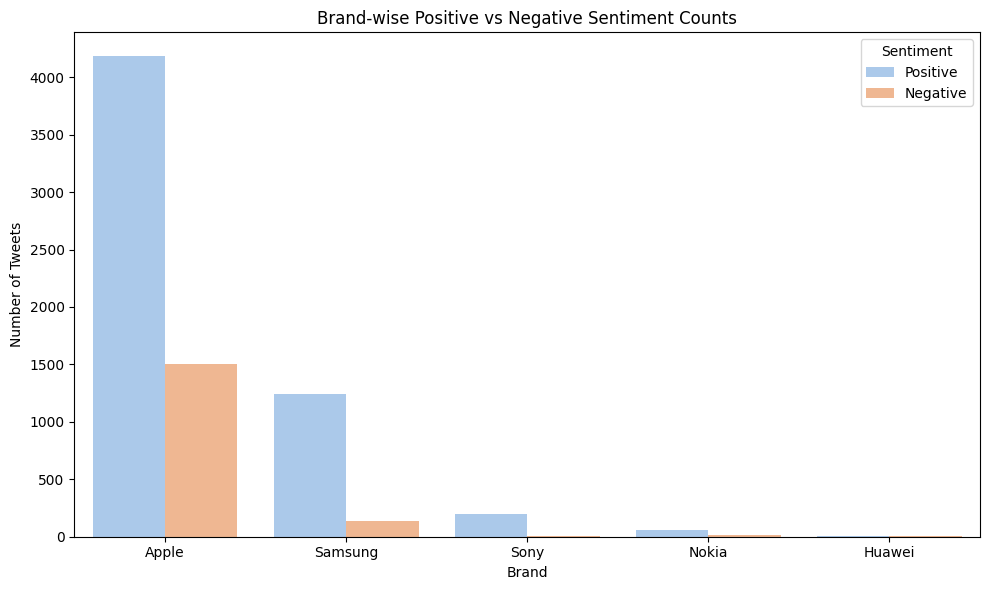

In [129]:
brand_sentiment = {
    'Apple': {'Positive': 4182, 'Negative': 1500},
    'Samsung': {'Positive': 1241, 'Negative': 137},
    'Sony': {'Positive': 202, 'Negative': 7},
    'Nokia': {'Positive': 56, 'Negative': 12},
    'Huawei': {'Positive': 6, 'Negative': 4}
}

# Convert to DataFrame for seaborn
df_sentiment = pd.DataFrame(brand_sentiment).T.reset_index()
df_sentiment = df_sentiment.rename(columns={'index': 'Brand'})

# Reshape DataFrame for seaborn plotting
df_long = pd.melt(df_sentiment, id_vars='Brand', value_vars=['Positive', 'Negative'],
                  var_name='Sentiment', value_name='Count')

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_long, x='Brand', y='Count', hue='Sentiment', palette='pastel')
plt.title('Brand-wise Positive vs Negative Sentiment Counts')
plt.ylabel('Number of Tweets')
plt.xlabel('Brand')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()



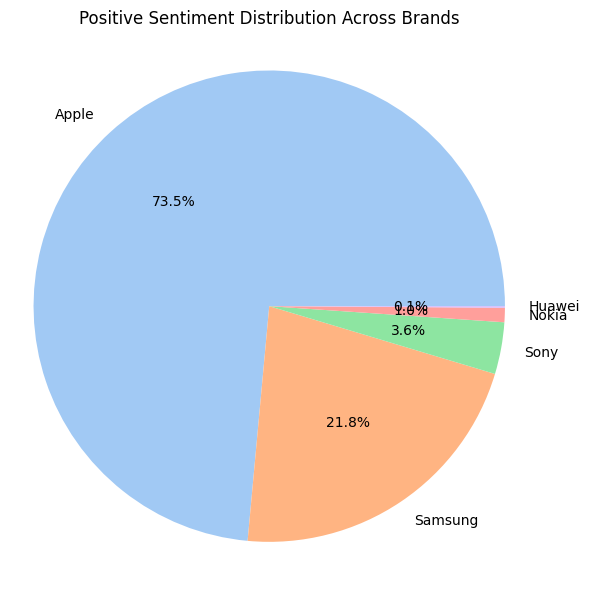

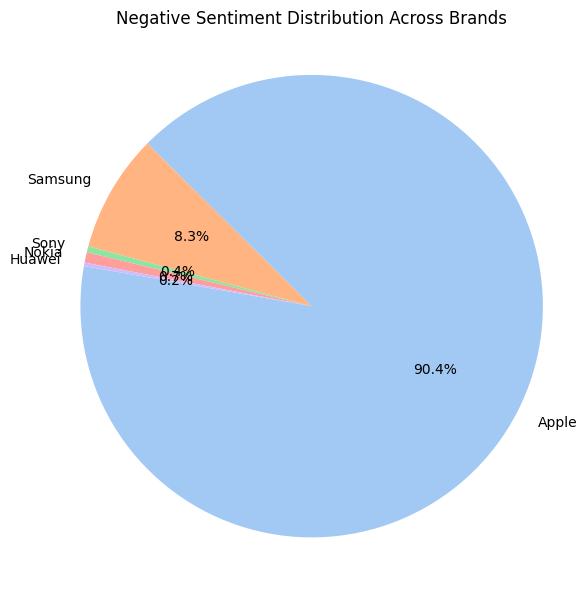

In [134]:
positive_counts = {
    'Apple': 4182,
    'Samsung': 1241,
    'Sony': 202,
    'Nokia': 56,
    'Huawei': 6
}

# Pie Chart for Positive Sentiment
plt.figure(figsize=(6, 6))
plt.pie(positive_counts.values(), labels=positive_counts.keys(), autopct='%1.1f%%', startangle=360, colors=sns.color_palette('pastel'))
plt.title('Positive Sentiment Distribution Across Brands')
plt.axis('equal')  # To make it circular
plt.tight_layout()
plt.show()

negative_counts = {
    'Apple': 1500,
    'Samsung': 137,
    'Sony': 7,
    'Nokia': 12,
    'Huawei': 4
}

# Pie Chart for Negative Sentiment
plt.figure(figsize=(6, 6))
plt.pie(negative_counts.values(), labels=negative_counts.keys(), autopct='%1.1f%%', startangle=170, colors=sns.color_palette('pastel'))
plt.title('Negative Sentiment Distribution Across Brands')
plt.axis('equal')
plt.tight_layout()
plt.show()



## Identify Best Model

In [135]:
# Replace these example values with your actual test set metrics for each model
model_metrics = {
    'Logistic Regression': {
        'Accuracy': 0.866,
        'Precision': 0.667,
        'Recall': 0.845,
        'F1-Score': 0.746,
        'ROC_AUC': 0.926
    },
    'Naive Bayes': {
        'Accuracy': 0.862,
        'Precision': 0.649,
        'Recall': 0.889,
        'F1-Score': 0.75,
        'ROC_AUC': 0.936
    },
    'LGBM': {
        'Accuracy': 0.879,  
        'Precision': 0.728,
        'Recall': 0.769,
        'F1-Score': 0.748,
        'ROC_AUC': 0.938
    },
    'XGBoost': {
        'Accuracy': 0.879,
        'Precision': 0.716,
        'Recall': 0.796,
        'F1-Score': 0.754,
        'ROC_AUC': 0.937
    }
}

# Convert dictionary to DataFrame
data = pd.DataFrame(model_metrics).T  # transpose for models as rows

print("Performance metrics for all models:\n")
print(data)

Performance metrics for all models:

                     Accuracy  Precision  Recall  F1-Score  ROC_AUC
Logistic Regression     0.866      0.667   0.845     0.746    0.926
Naive Bayes             0.862      0.649   0.889     0.750    0.936
LGBM                    0.879      0.728   0.769     0.748    0.938
XGBoost                 0.879      0.716   0.796     0.754    0.937


In [136]:
# Create a new column: average of F1 and ROC AUC
data['F1+ROC_AUC_Avg'] = (data['F1-Score'] + data['ROC_AUC']) / 2

# Identify best model based on this combined score
best_combo_model = data['F1+ROC_AUC_Avg'].idxmax()
best_combo_score = data.loc[best_combo_model, 'F1+ROC_AUC_Avg']

# Show results
print("\nAll models with combined (F1 + ROC_AUC) average:\n")
print(data[['F1-Score', 'ROC_AUC', 'F1+ROC_AUC_Avg']])

print(f"\n Best overall model (balanced F1 + ROC AUC): {best_combo_model} with score {best_combo_score:.3f}")


All models with combined (F1 + ROC_AUC) average:

                     F1-Score  ROC_AUC  F1+ROC_AUC_Avg
Logistic Regression     0.746    0.926          0.8360
Naive Bayes             0.750    0.936          0.8430
LGBM                    0.748    0.938          0.8430
XGBoost                 0.754    0.937          0.8455

 Best overall model (balanced F1 + ROC AUC): XGBoost with score 0.846


### Save model

In [137]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(xgb, file)